Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#Recommender
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display, Image


#Clustering(Segmentation)
from sklearn.cluster import KMeans
#PCA
from sklearn.decomposition import PCA


#Price prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder


import warnings
warnings.filterwarnings('ignore')


Loading the data

In [107]:
data = pd.read_csv('samsungMobilesData.csv')

#Creating a parquet file for it
data. to_parquet('samsungMobilesData.parquet')

data.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12


Loading the new data

In [108]:
new_data = pd.read_csv('samsung_mobile_new_data.csv')

#Creating a parquet file for it
new_data. to_parquet('samsung_mobile_new_data.parquet')

new_data.head()

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,"₹9,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,"₹15,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBTotal Memory128 G...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",Battery Capacity5000 mAh


# 1.Data Cleaning & Preprocessing

### 1.1 Eliminating the currency symbol in the new dataset

In [109]:
new_data['price'] = new_data['price'].str.replace('₹', '').str.replace(',', '').astype(int)


### 1.2 Splitting Fields

1.2.1: 'storage_ram' field into 'internal_storage', 'ram', and 'expandable_storage'

In [110]:
new_data['internal_storage'] = new_data['storage_ram'].str.extract('Internal Storage(\d+) GB', expand=False).astype(float)
new_data['ram'] = new_data['storage_ram'].str.extract('RAM(\d+) GB', expand=False).astype(float)
new_data['expandable_storage'] = new_data['storage_ram'].str.extract('Expandable Storage(\d+) GB', expand=False).astype(float)

1.2.2: os_processor' field into 'os' and 'processor_type'

In [111]:
new_data['os'] = new_data['os_processor'].str.extract('Operating System(.+?)Processor', expand=False).str.strip()
new_data['processor_type'] = new_data['os_processor'].str.extract('Processor Type(.+)', expand=False).str.strip()

1.2.3: 'camera' field into 'primary_camera', 'secondary_camera', and 'flash_type'

In [112]:
new_data['primary_camera'] = new_data['camera'].str.extract('Primary Camera(\d+)MP', expand=False).astype(float)
new_data['secondary_camera'] = new_data['camera'].str.extract('Secondary Camera(\d+)MP', expand=False).astype(float)
new_data['flash_type'] = new_data['camera'].str.extract('Flash(.+?)', expand=False).str.strip()

1.2.4: 'display' field into 'display_size', 'resolution', 'display_type', and 'other_display_features'

In [113]:
new_data['display_size'] = new_data['display'].str.extract('Display Size(.+?) cm', expand=False).str.replace('(', '').astype(float)
new_data['resolution'] = new_data['display'].str.extract('Resolution(.+?)Pixels', expand=False).str.strip()
new_data['display_type'] = new_data['display'].str.extract('Display Type(.+?)', expand=False).str.strip()

1.2.5: 'network' field into 'network_type' and 'supported_networks'

In [114]:
new_data['network_type'] = new_data['network'].str.extract('Network Type(.+?)Supported', expand=False).str.strip()
new_data['supported_networks'] = new_data['network'].str.extract('Supported Networks(.+)', expand=False).str.strip()

### 1.3 Fill missing values in 'battery_capacity' with -1 before converting to integer

In [115]:
new_data['battery_capacity'] = new_data['battery'].str.extract('Battery Capacity(\d+) mAh', expand=False).fillna(-1).astype(int)

new_data.head()

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery,internal_storage,ram,expandable_storage,os,processor_type,primary_camera,secondary_camera,flash_type,display_size,resolution,display_type,network_type,supported_networks,battery_capacity
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo,64.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBTotal Memory128 G...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",Battery Capacity5000 mAh,128.0,6.0,NaN,Android 12,Qualcomm Snapdragon 750GProcessor CoreOcta Cor...,50.0,8.0,Y,16.76,2408 x 1080,F,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",5000


### 1.4 Drop the original columns

In [116]:
new_data.drop(['storage_ram', 'os_processor', 'camera', 'display', 'network', 'battery'], axis=1, inplace=True)

new_data.head()

,name,ratings,price,imgURL,internal_storage,ram,expandable_storage,os,processor_type,primary_camera,secondary_camera,flash_type,display_size,resolution,display_type,network_type,supported_networks,battery_capacity
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,64.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,6.0,NaN,Android 12,Qualcomm Snapdragon 750GProcessor CoreOcta Cor...,50.0,8.0,Y,16.76,2408 x 1080,F,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",5000


# 2. EDA

Concatenate the original dataset and the new dataset

In [117]:
full_data = pd.concat([data, new_data], ignore_index=True)


- Rating

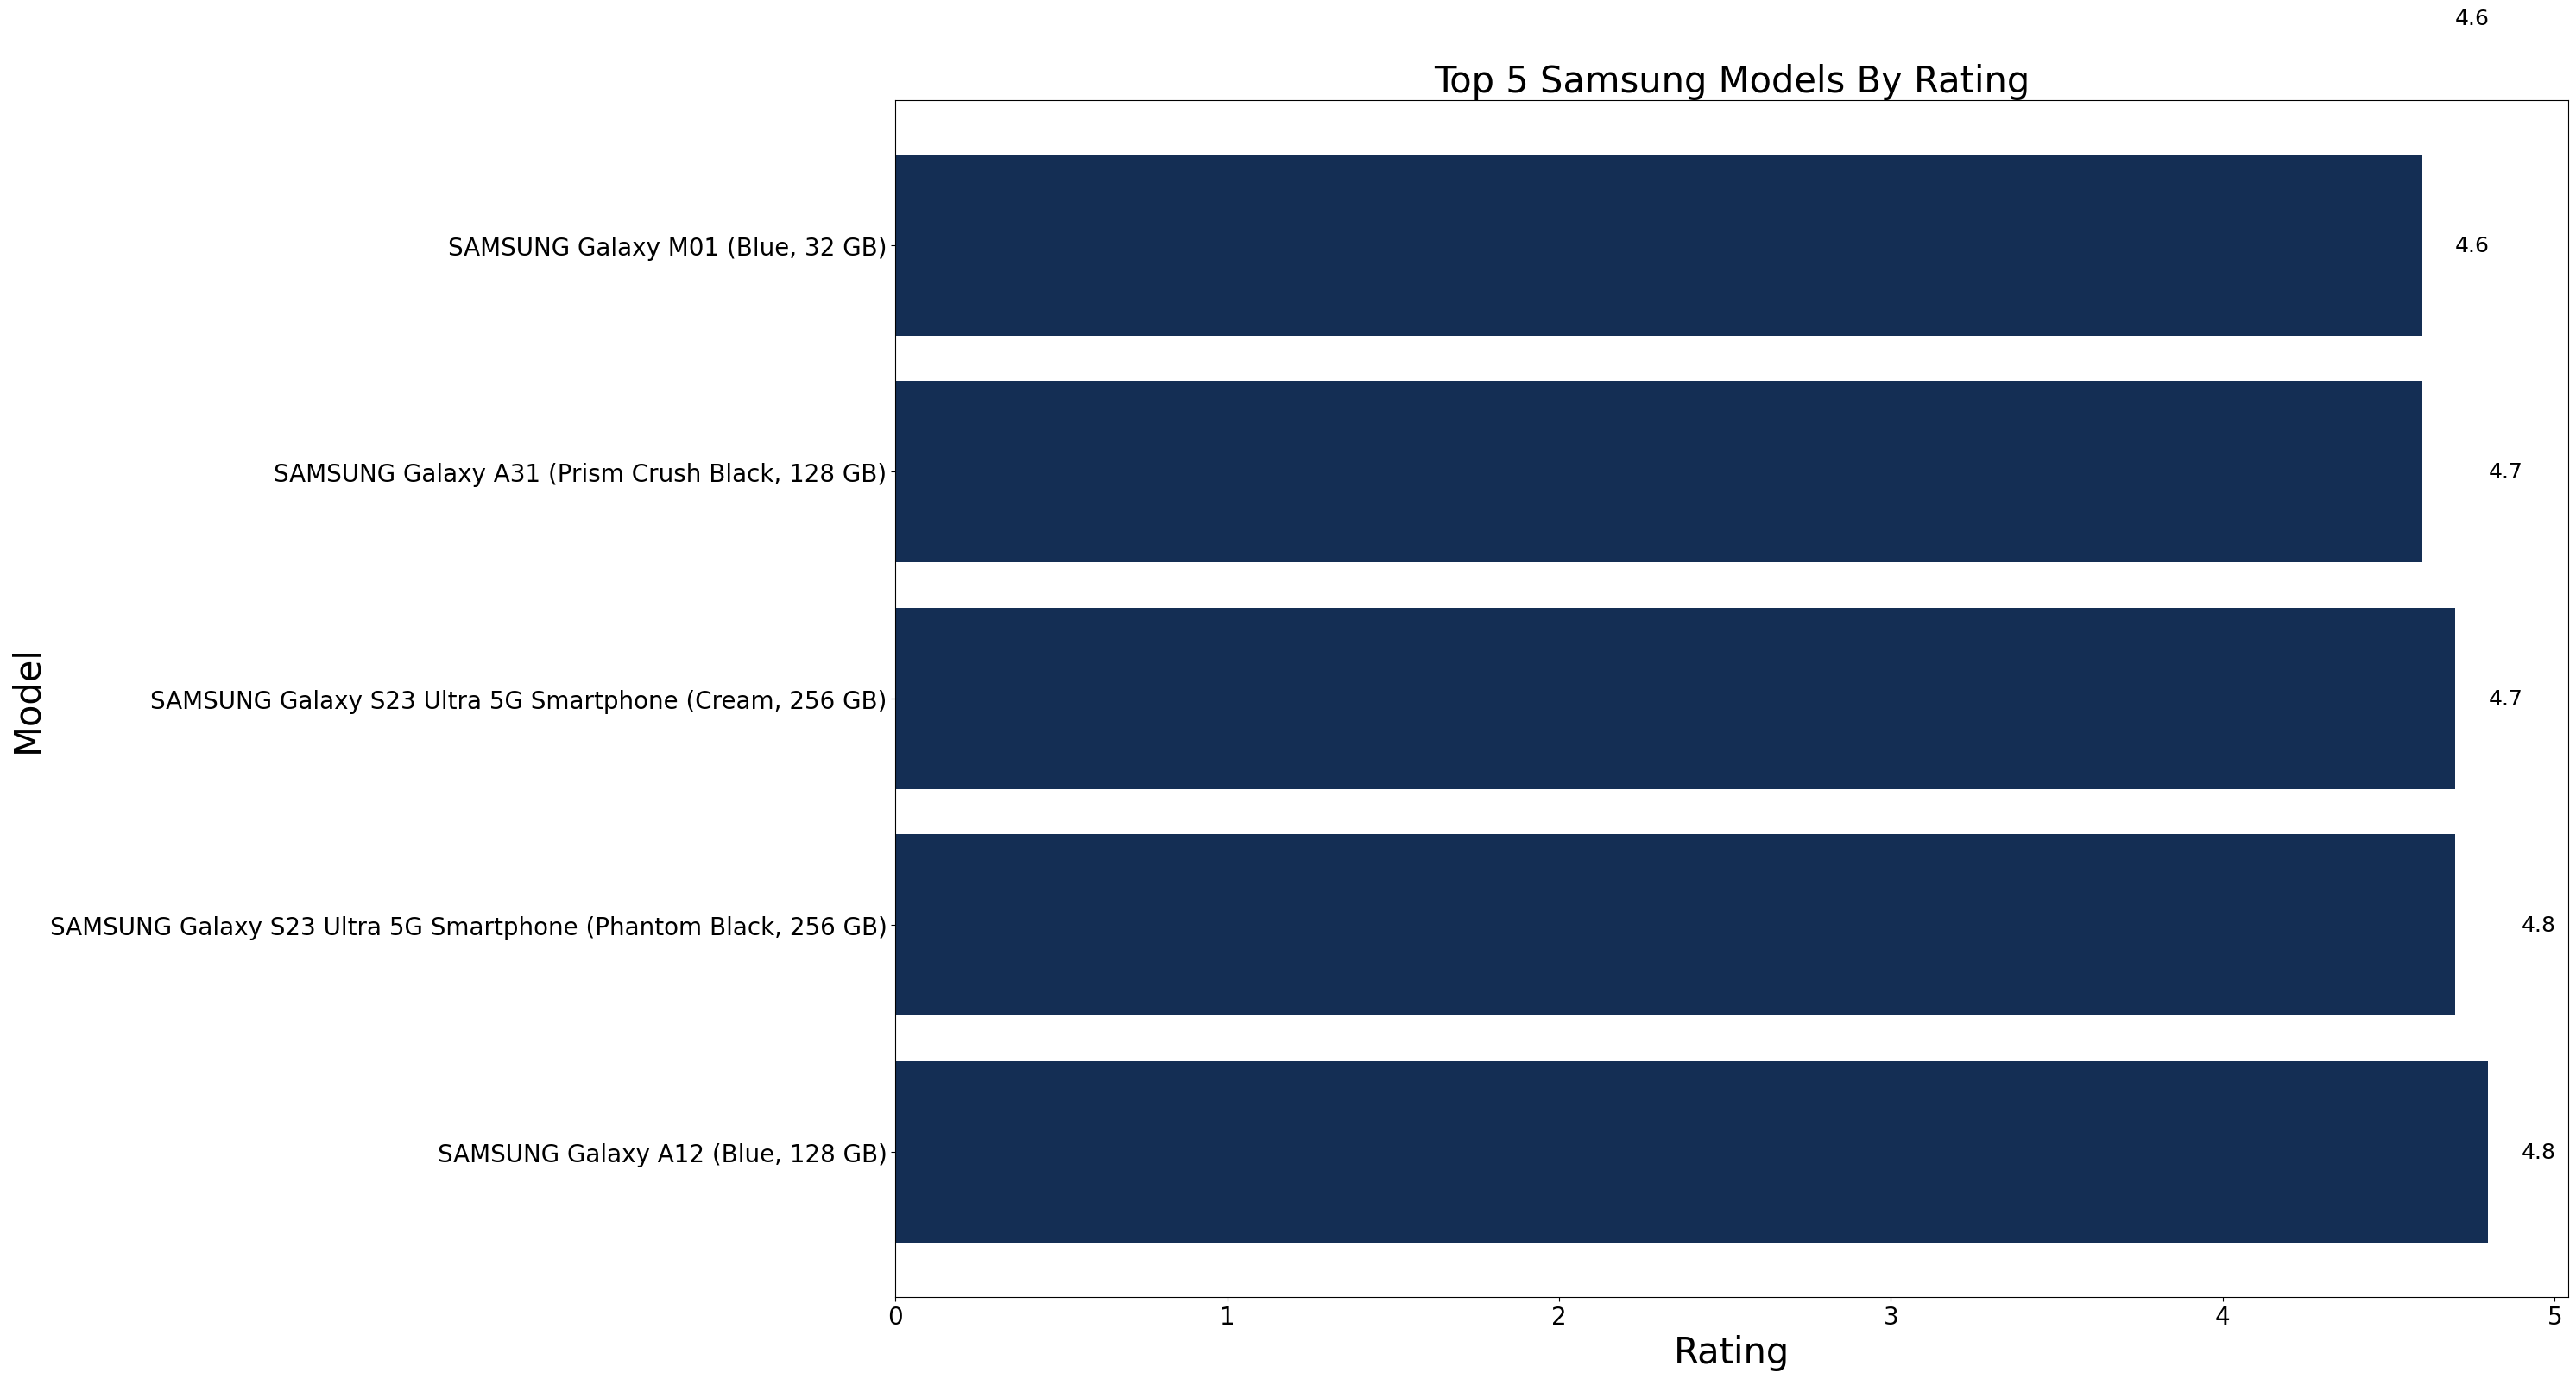

In [118]:
# Samsung color
samsung_blue = '#142E54'

# Sorting the data by ratings in ascending order
sorted_data = full_data.sort_values(by='ratings', ascending=True).nlargest(6, 'ratings')

# Setting up the figure size and font size
plt.figure(figsize=(25, 18))
plt.rcParams['font.size'] = 20

# Creating the horizontal bar plot with Samsung blue color
plt.barh(sorted_data['name'], sorted_data['ratings'], color=samsung_blue)

# Adding labels and title with larger font size
plt.ylabel('Model', fontsize=30)
plt.xlabel('Rating', fontsize=30)
plt.title('Top 5 Samsung Models By Rating', fontsize=30)

# Displaying the rating values near the bars
for index, value in enumerate(sorted_data['ratings']):
    plt.text(value + 0.1, index, f'{value}', va='center', color='black', fontsize=18)

# Display the plot
plt.show()

- Price

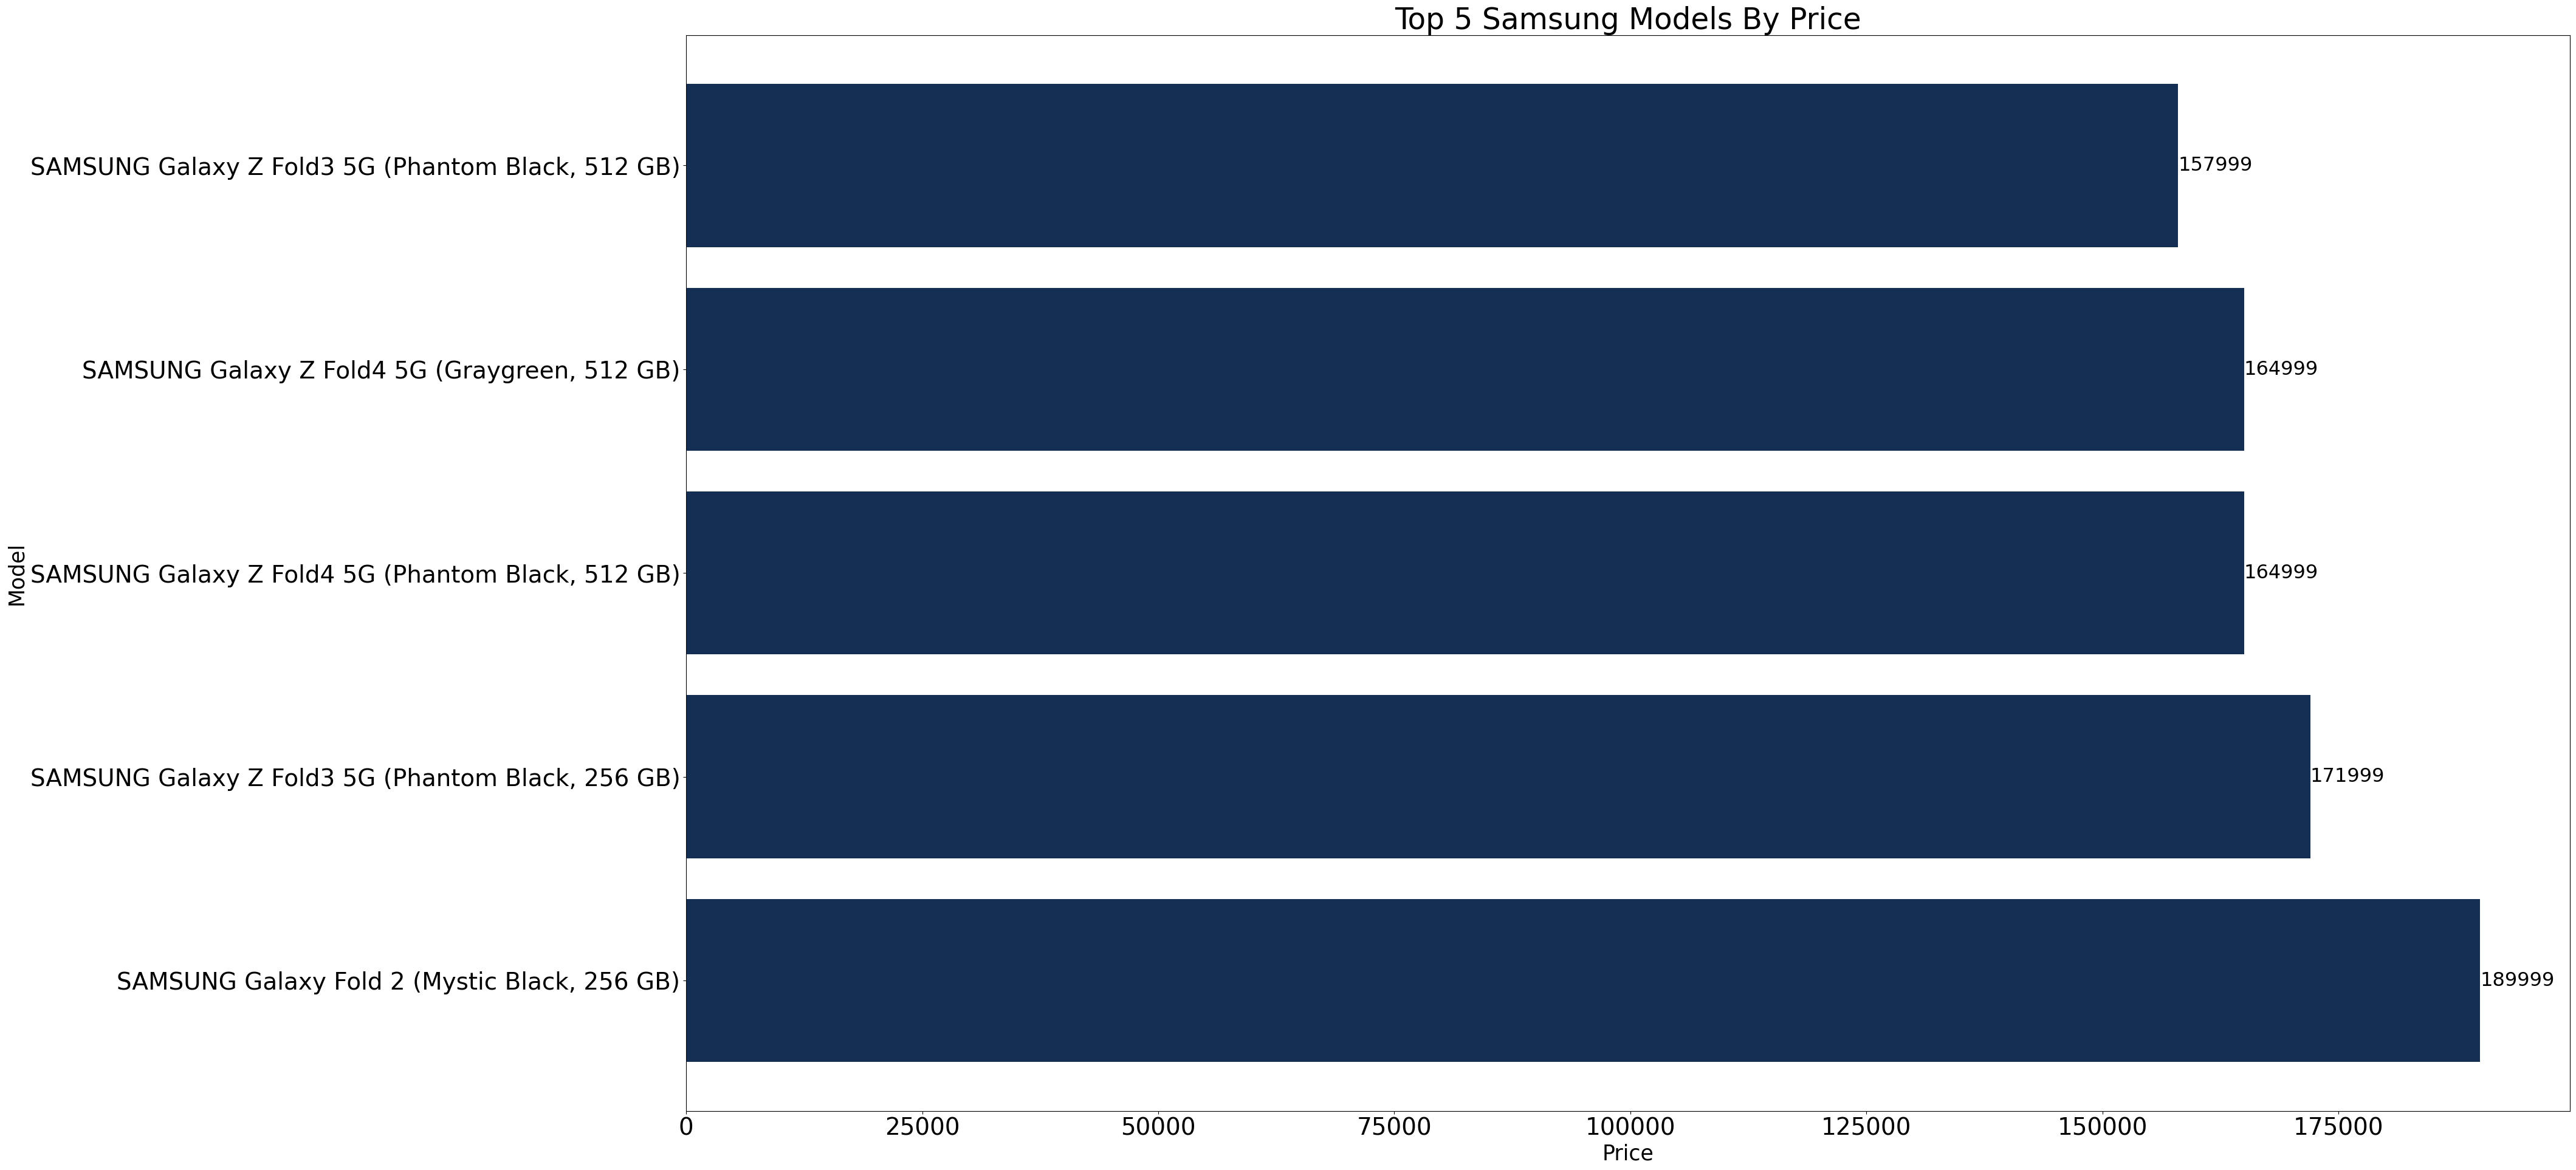

In [119]:
# Samsung color
samsung_blue = '#142E54'

# Sorting the data by ratings in ascending order
sorted_data = full_data.sort_values(by='price', ascending=True).nlargest(5, 'price')

# Setting up the figure size and font size
plt.figure(figsize=(40, 23))
plt.rcParams['font.size'] = 28

# Creating the horizontal bar plot with Samsung blue color
plt.barh(sorted_data['name'], sorted_data['price'], color=samsung_blue)

# Adding labels and title with larger font size
plt.ylabel('Model', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.title('Top 5 Samsung Models By Price', fontsize=35)

# Displaying the rating values near the bars
for index, value in enumerate(sorted_data['price']):
    plt.text(value + 0.1, index, f'{value}', va='center', color='black', fontsize=23)

# Display the plot
plt.show()

- Internal Storage

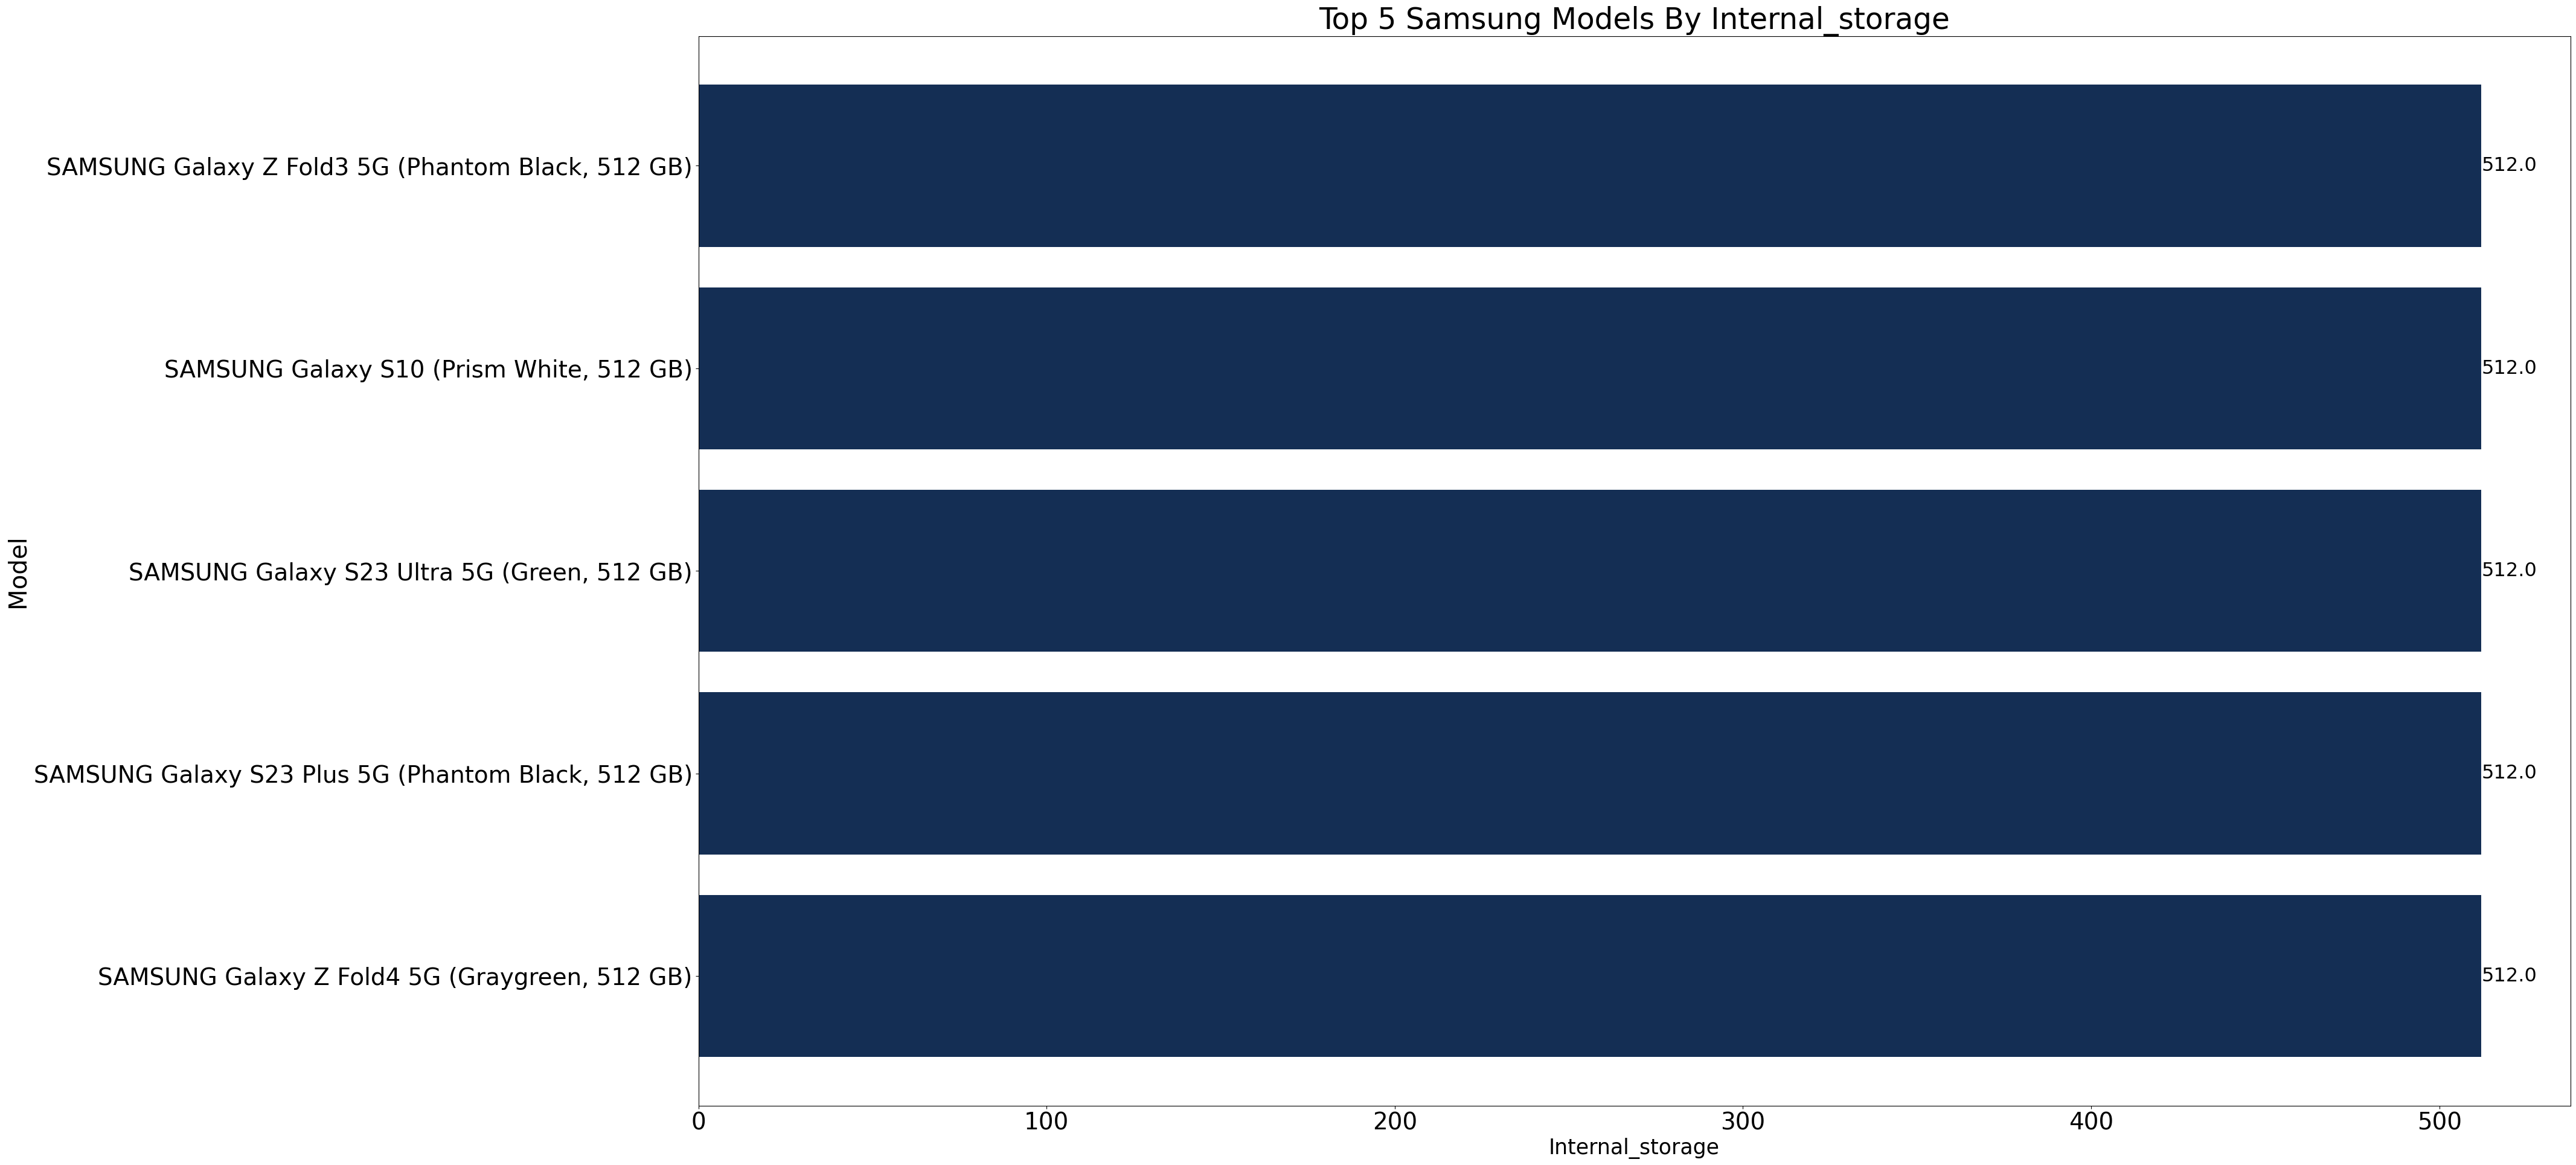

In [120]:
# Samsung color
samsung_blue = '#142E54'

# Sorting the data by ratings in ascending order
sorted_data = full_data.sort_values(by='internal_storage', ascending=True).nlargest(5, 'internal_storage')

# Setting up the figure size and font size
plt.figure(figsize=(40, 23))
plt.rcParams['font.size'] = 28

# Creating the horizontal bar plot with Samsung blue color
plt.barh(sorted_data['name'], sorted_data['internal_storage'], color=samsung_blue)

# Adding labels and title with larger font size
plt.ylabel('Model', fontsize=29)
plt.xlabel('Internal_storage', fontsize=25)
plt.title('Top 5 Samsung Models By Internal_storage', fontsize=35)

# Displaying the rating values near the bars
for index, value in enumerate(sorted_data['internal_storage']):
    plt.text(value + 0.1, index, f'{value}', va='center', color='black', fontsize=23)

# Display the plot
plt.show()

- Ram

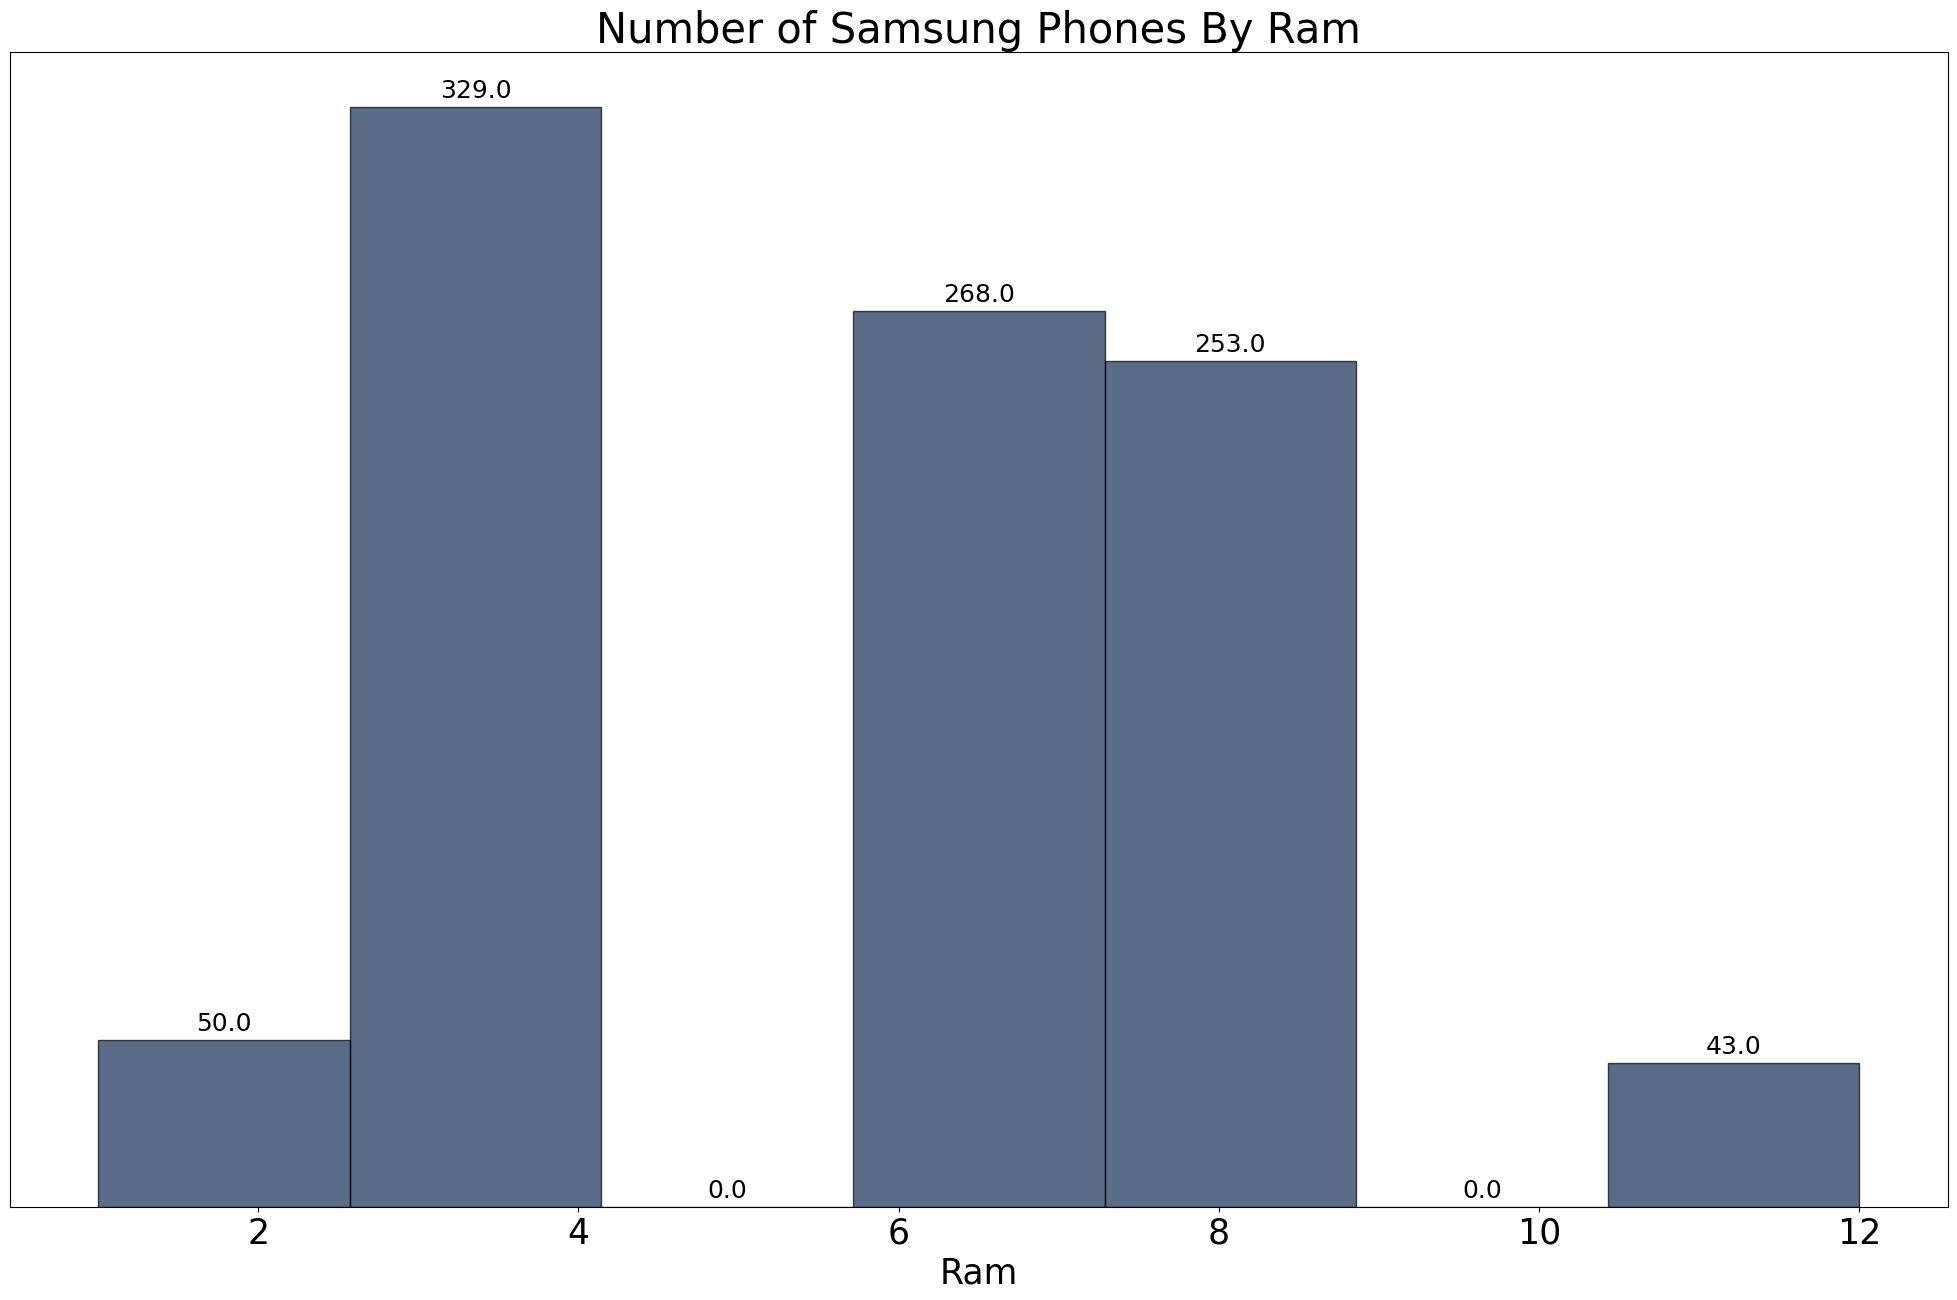

In [121]:
# Samsung color
samsung_blue = '#142E54'

# Setting up the figure size and font size
plt.figure(figsize=(25, 15))
plt.rcParams['font.size'] = 25

n, bins, patches = plt.hist(full_data['ram'], bins=7, edgecolor='black', color= samsung_blue, alpha=0.7)

for patch in patches:
    height = patch.get_height()
    plt.annotate(f'{height:.1f}', xy=(patch.get_x() + patch.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=18, color='black')
    
plt.gca().axes.get_yaxis().set_visible(False)

plt.xlabel('Ram', fontsize=25)
plt.title('Number of Samsung Phones By Ram', fontsize=30)
plt.show()

#### Price vs Other features 

- Ratings

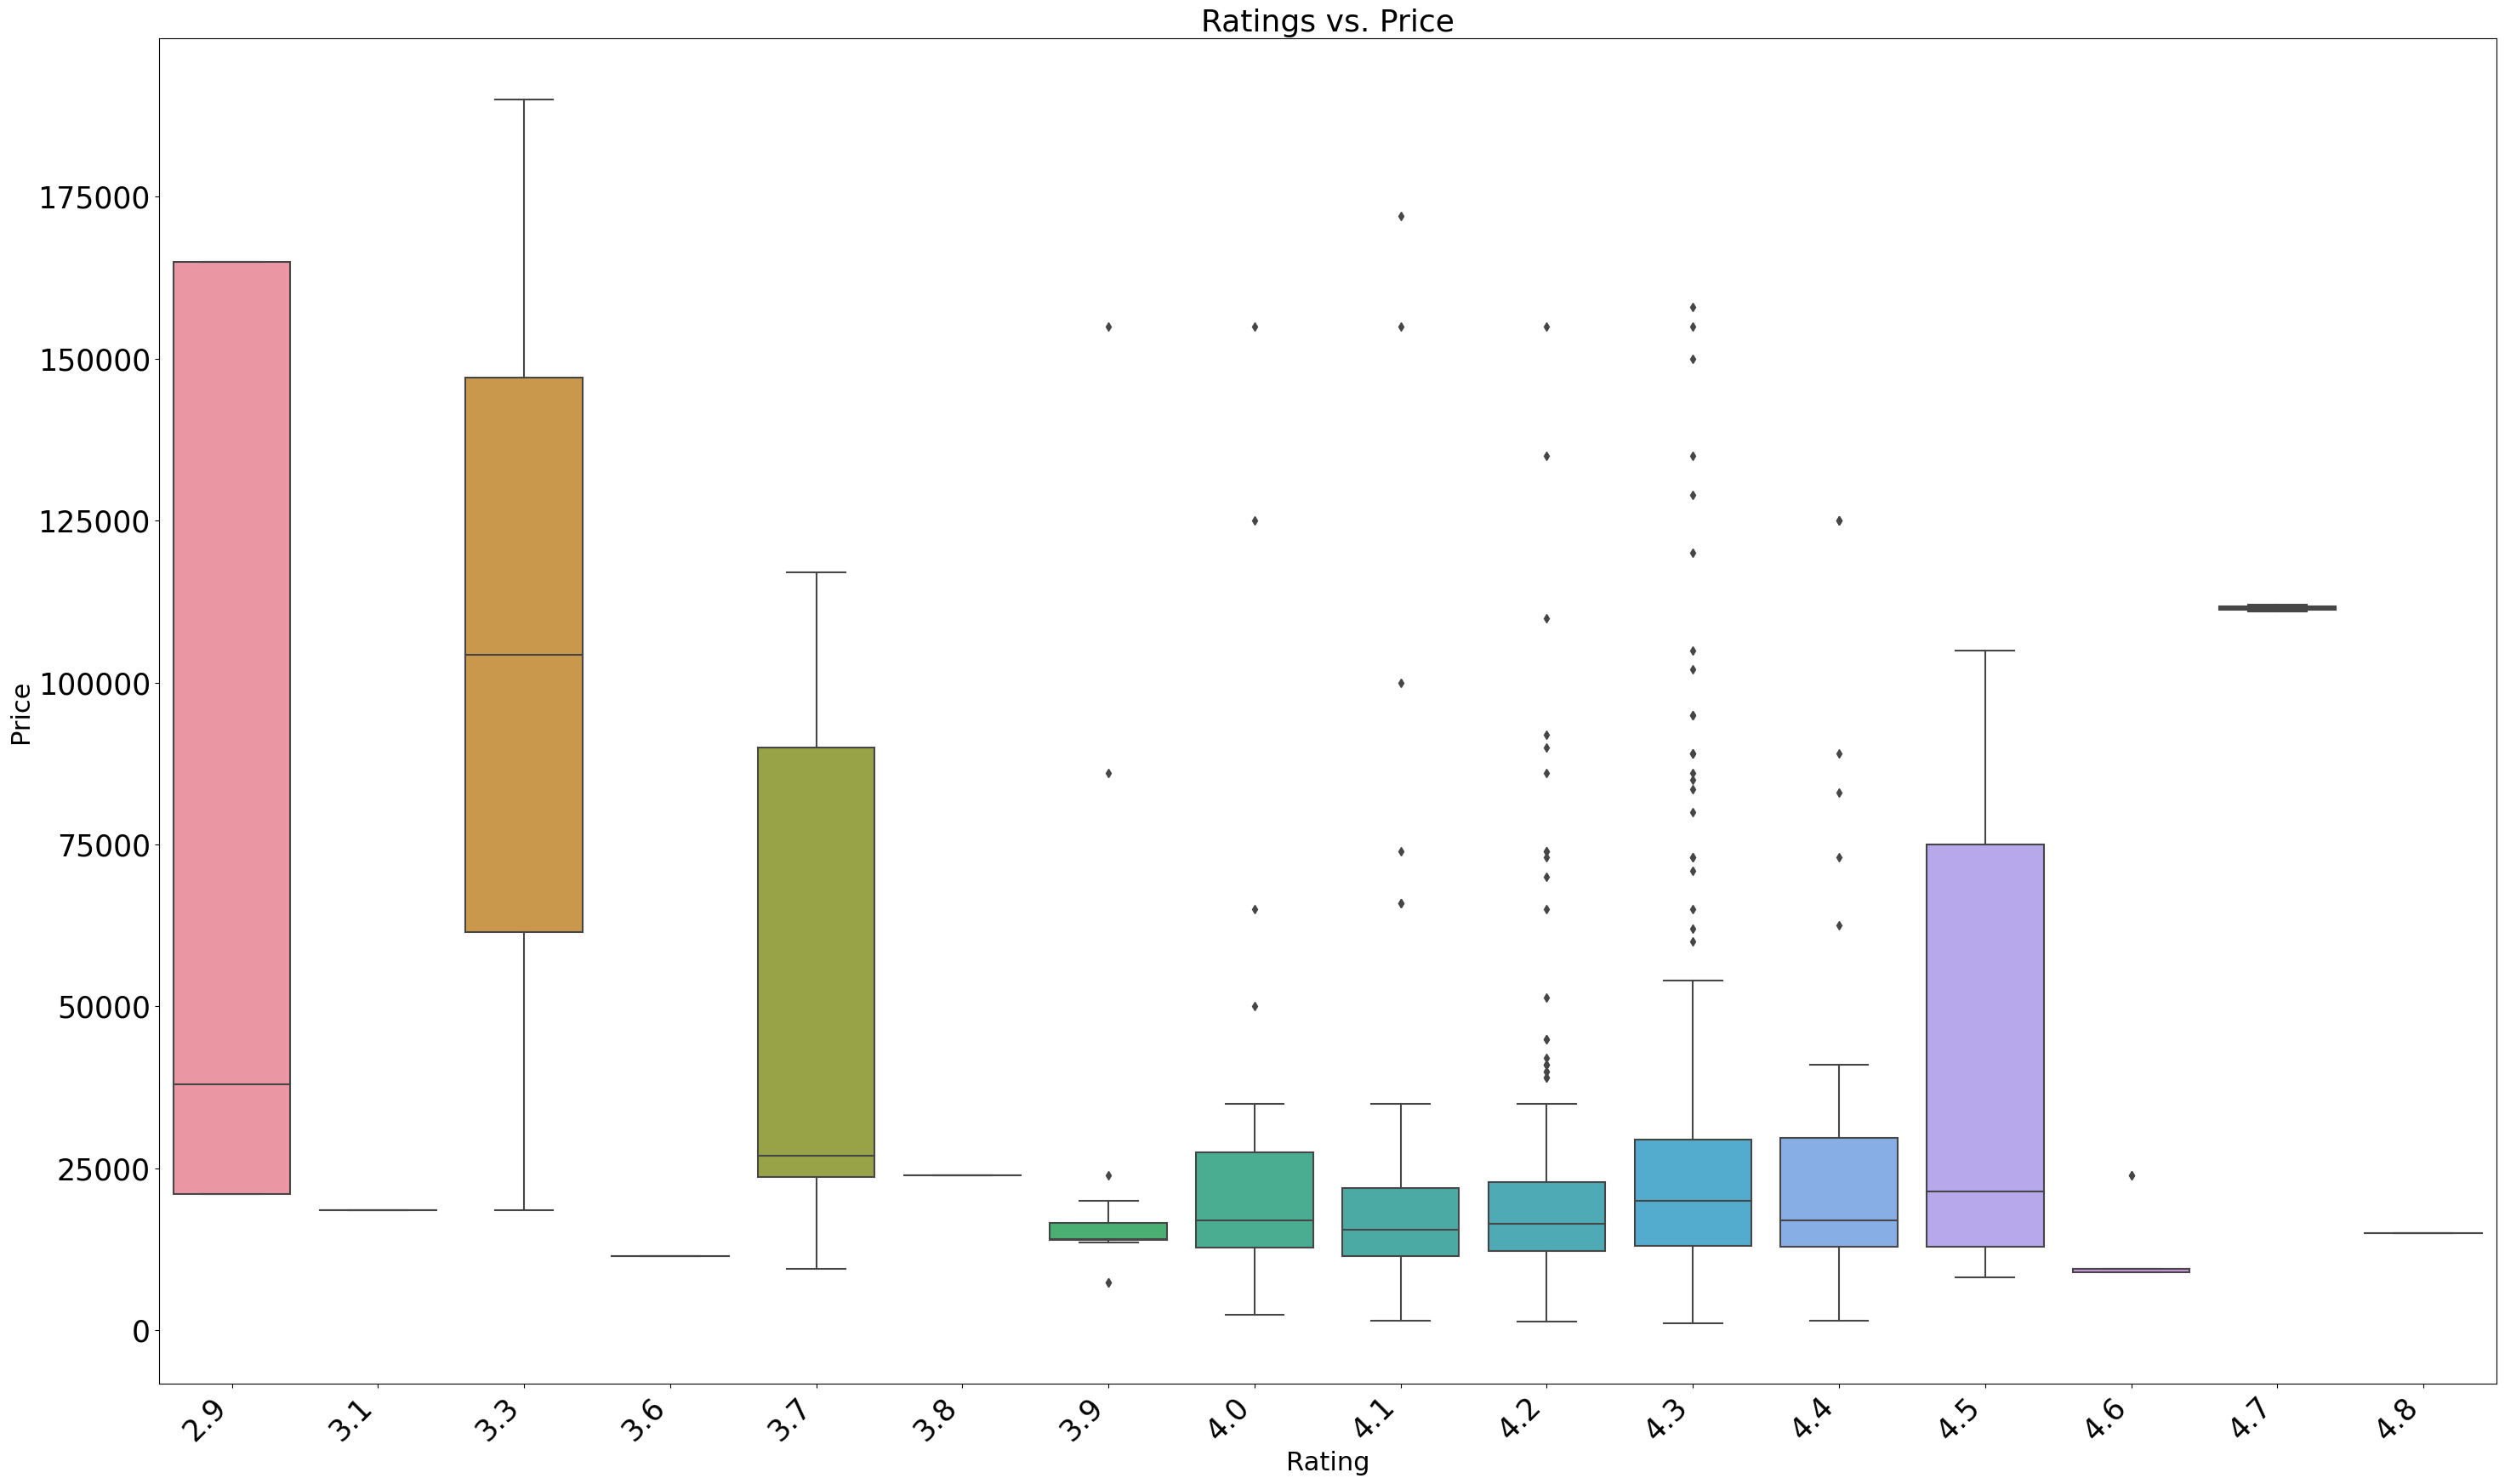

In [122]:
plt.figure(figsize=(30, 18))
sns.boxplot(x='ratings', y='price', data=full_data)
plt.xlabel('Rating').set_fontsize(22)
plt.ylabel('Price').set_fontsize(22)
plt.title('Ratings vs. Price').set_fontsize(26)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Smartphones priced at 25,000 and below constitute a sizable portion of the 4+ ratings. This is likely due to the fact that their affordability results in them having more users

- Ram

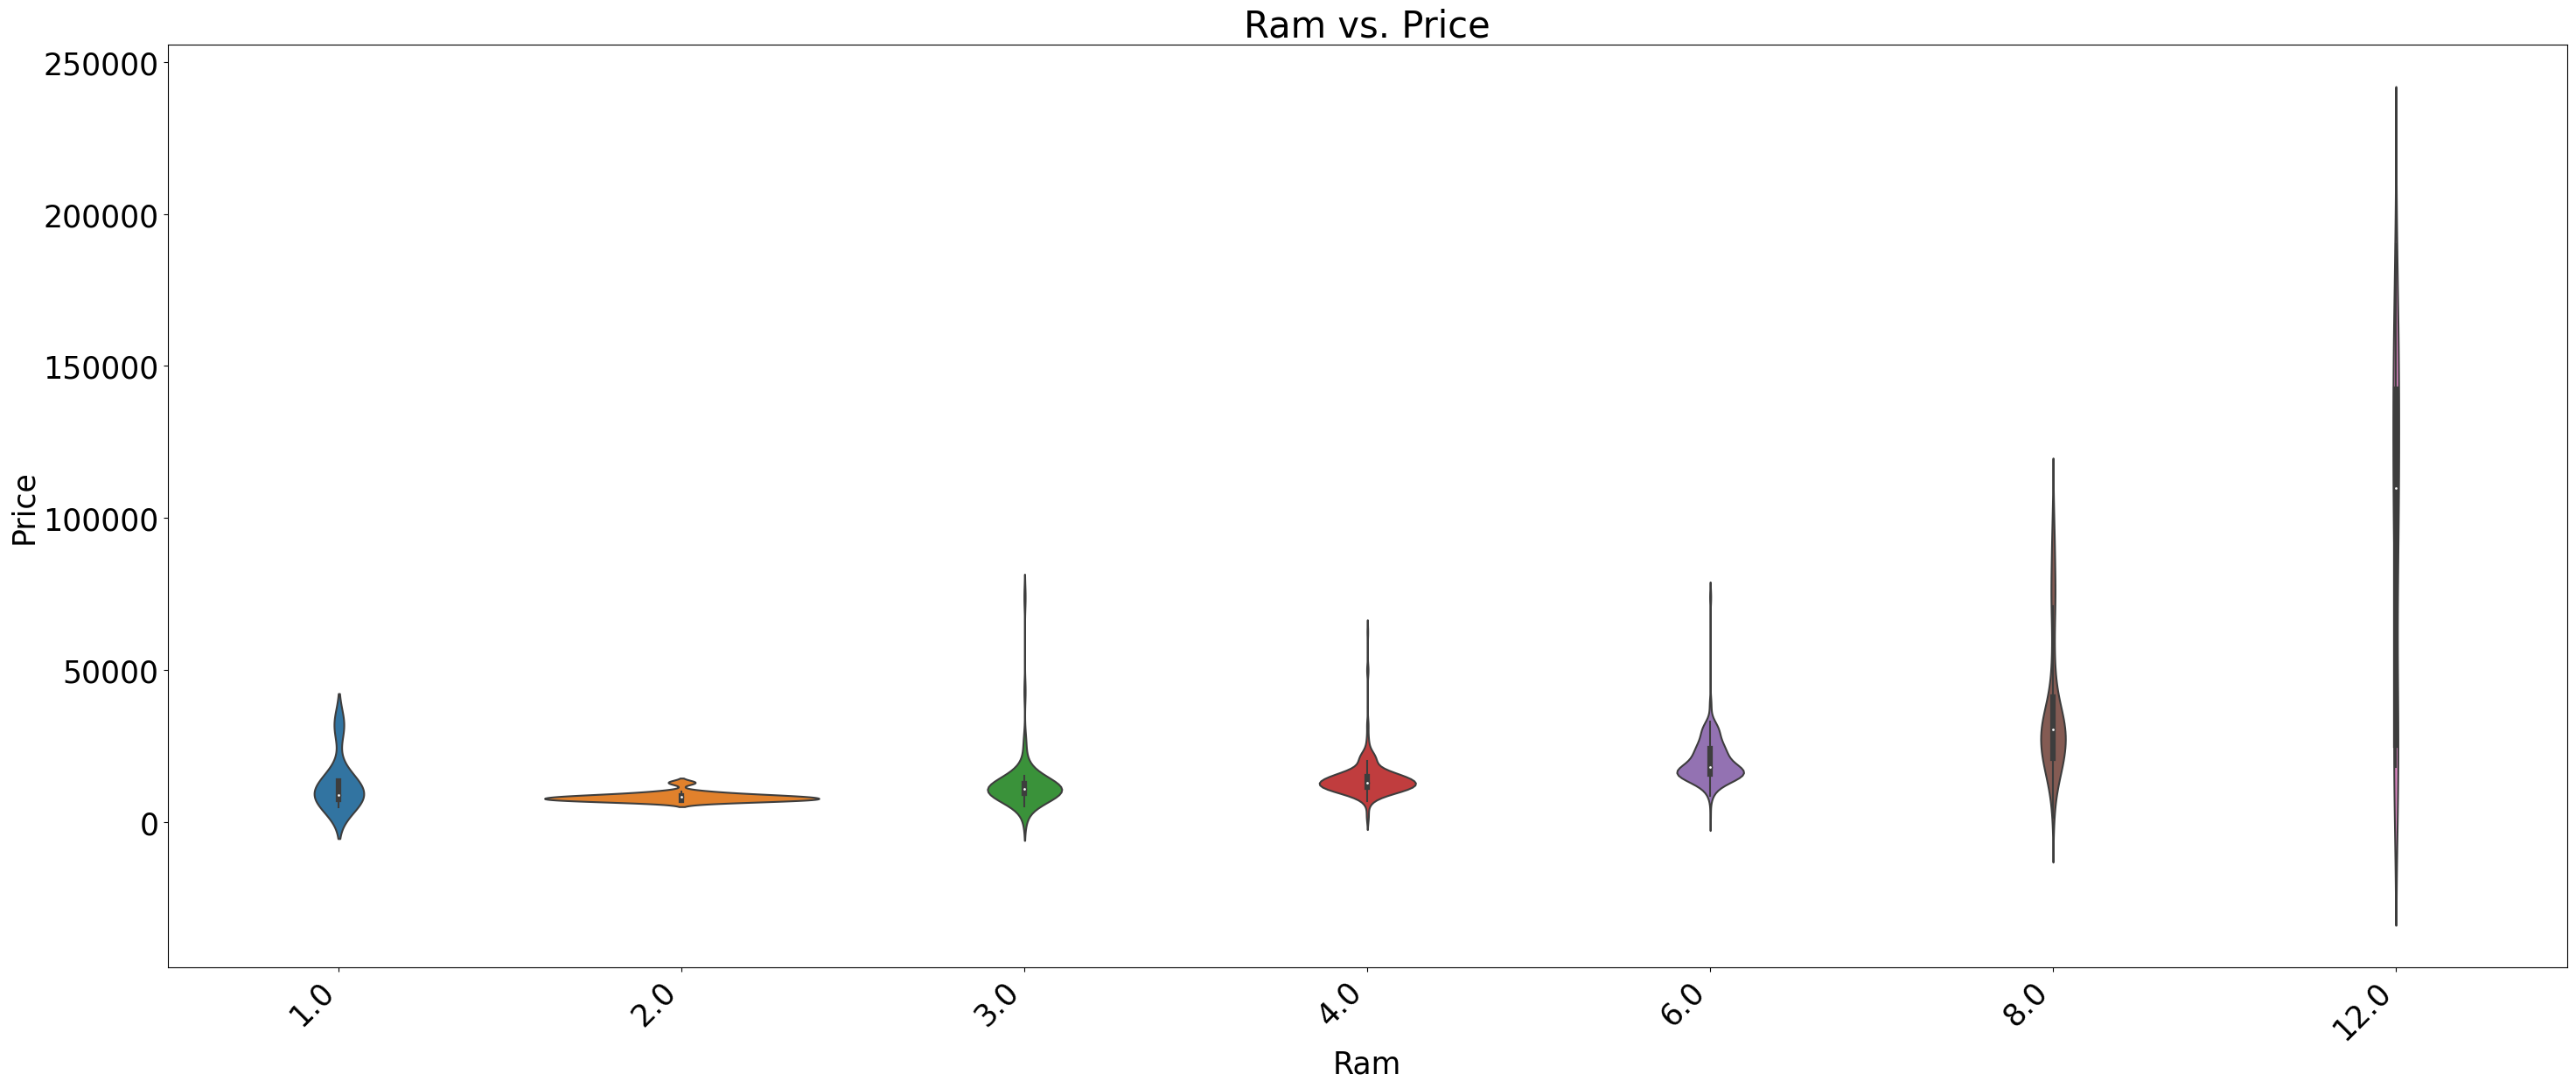

In [123]:
plt.figure(figsize=(30, 13))
sns.violinplot(x='ram', y='price', data=full_data)
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('Ram vs. Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Clearly, a higher ram is associated with a higher smartphone price

- Camera

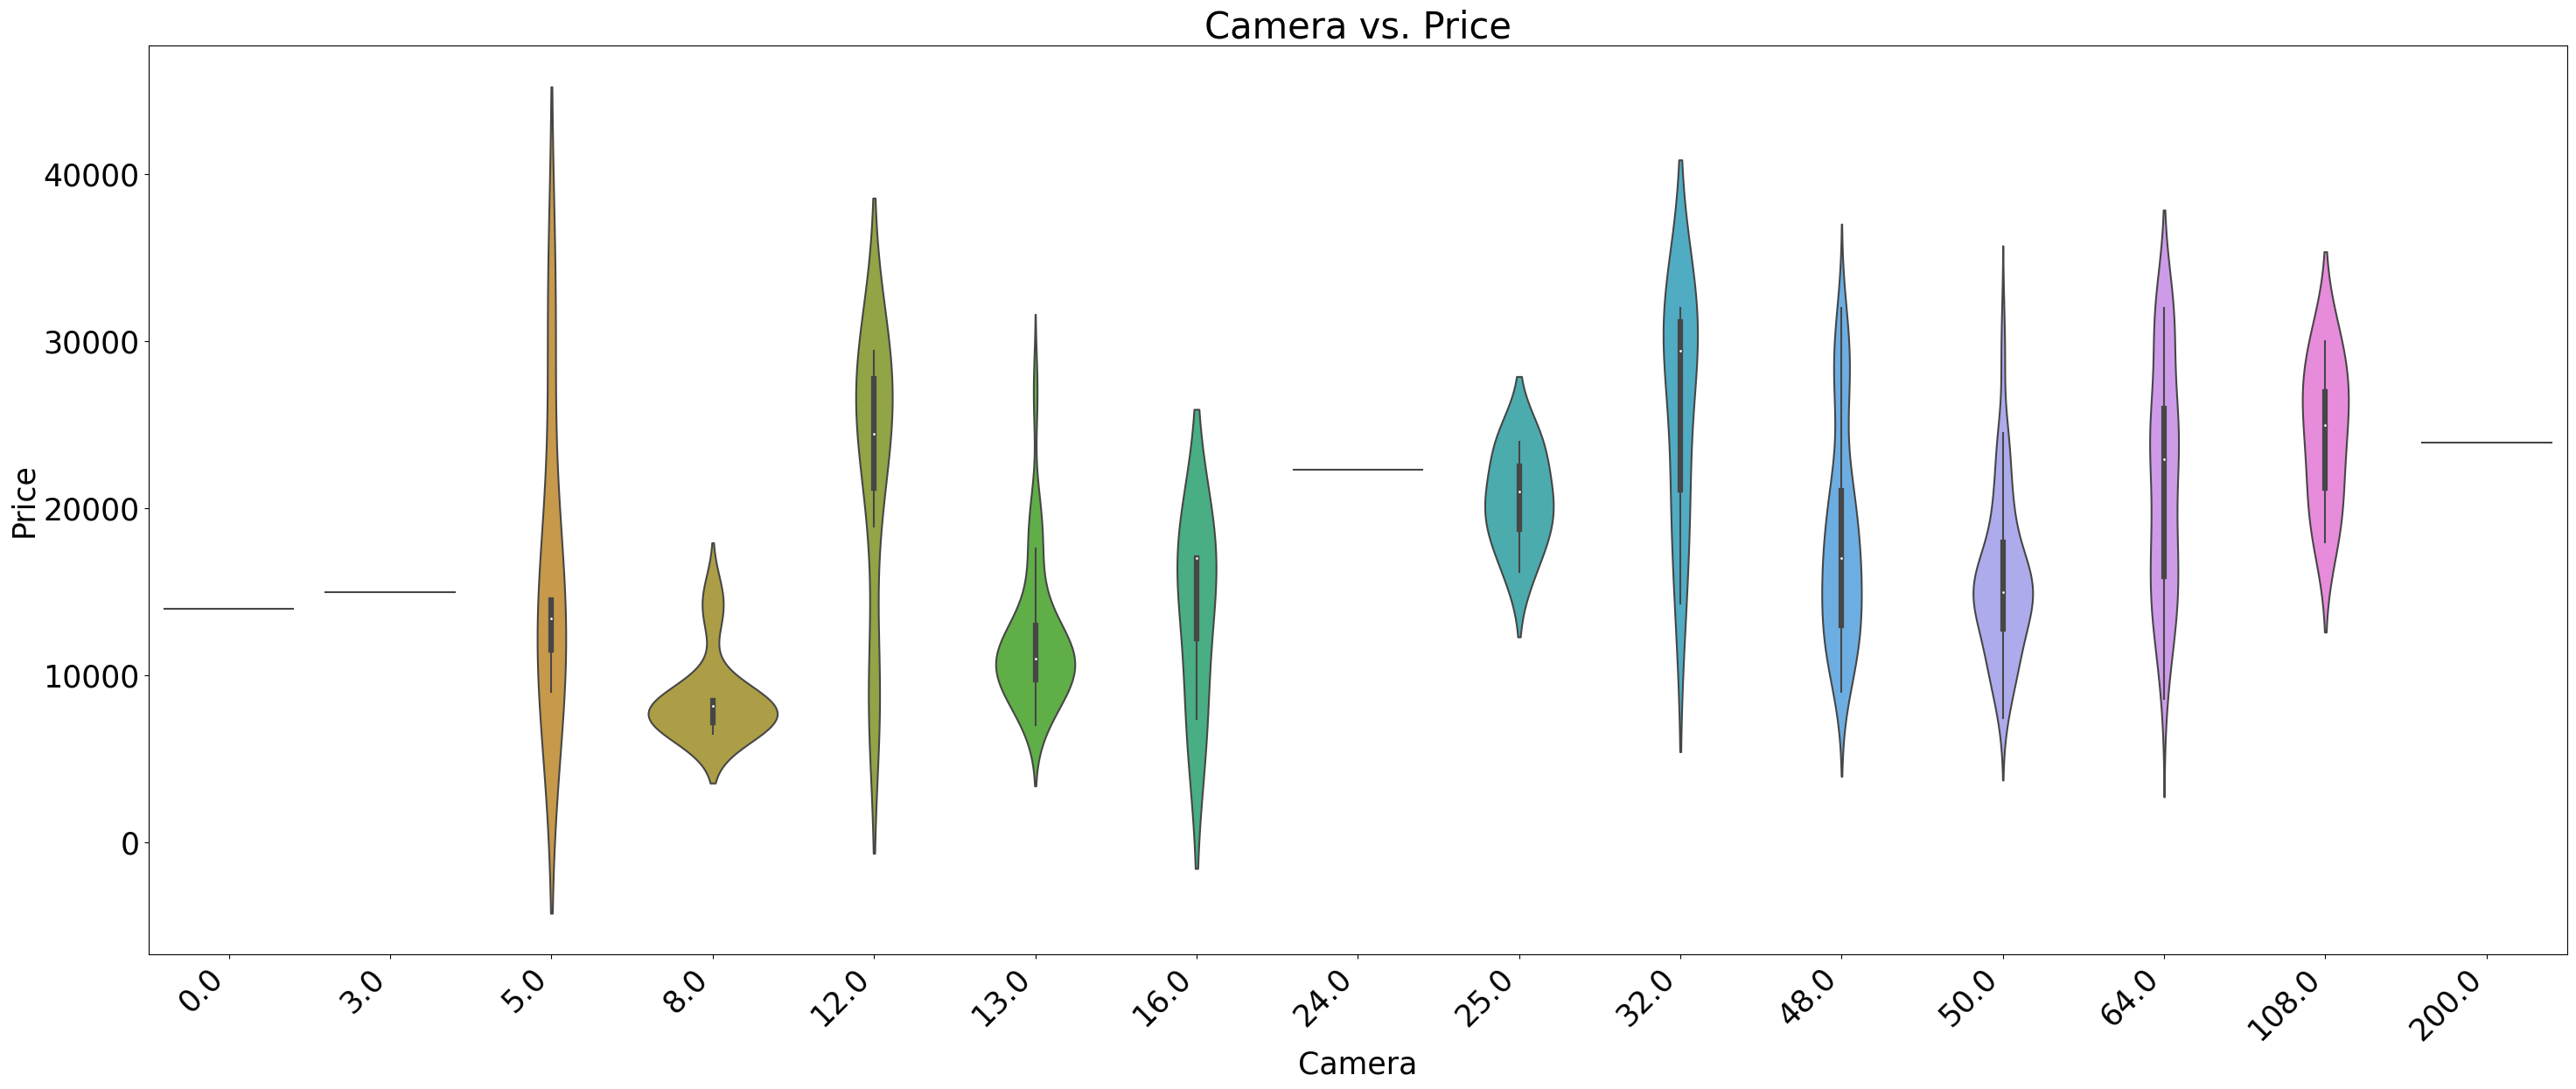

In [124]:
plt.figure(figsize=(30, 13))
sns.violinplot(x='camera', y='price', data=full_data)
plt.xlabel('Camera')
plt.ylabel('Price')
plt.title('Camera vs. Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3.Recommender

Select numeric features

In [125]:
features = ['ratings', 'price', 'internal_storage', 'ram', 'primary_camera', 'secondary_camera', 'display_size', 'battery_capacity']
data_subset = full_data[features]

Handle missing values by filling them with the mean value of each column

In [126]:
data_subset = data_subset.fillna(data_subset.mean())

Standardize the features

In [127]:
scaler = StandardScaler()
data_subset_scaled = scaler.fit_transform(data_subset)

Compute the cosine similarity for the first 5 products

In [128]:
similarity_matrix = cosine_similarity(data_subset_scaled[:5])

similarity_matrix

array([[1.        , 0.99954149, 0.99954149, 0.99954149, 0.59585076],
       [0.99954149, 1.        , 1.        , 1.        , 0.58700707],
       [0.99954149, 1.        , 1.        , 1.        , 0.58700707],
       [0.99954149, 1.        , 1.        , 1.        , 0.58700707],
       [0.59585076, 0.58700707, 0.58700707, 0.58700707, 1.        ]])

This matrix tells us how similar each product is to each other product. For example, the similarity between the first product and itself is 1 (as expected), and the similarity between the first product and the second product is 0.999, indicating they are very similar.

### Getting Product Recommendation based on model

Function to recommend products

In [129]:
def recommend_products(product_name, data, features, num_recommendations=5):
    # Fill missing values with the mean value of each column
    data = data.fillna(data.mean())
    
    # Select the specified features and standardize them
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])
    
    # Create a DataFrame from the scaled data
    data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=features)
    
    # Compute the cosine similarity matrix
    similarity_matrix = cosine_similarity(data_scaled)
    
    # Create a Series from the similarity matrix using the product names as the index
    product_similarities = pd.Series(similarity_matrix[data.index[data['name'] == product_name][0]], index=data['name'])
    
    # Get the top products with the highest cosine similarity
    top_products = product_similarities.sort_values(ascending=False).head(num_recommendations + 1)
    
    # Remove the input product itself from the recommendations
    top_products = top_products.iloc[1:]
    
    return top_products

# Dropdown widget for product selection
product_dropdown = widgets.Dropdown(
    options=full_data['name'].unique(),
    description='Product:',
    disabled=False,)

In [130]:
# Button to trigger the recommendation
recommend_button = widgets.Button(description='Recommend')

# Output widget to display the recommendations
output = widgets.Output()

display(product_dropdown, recommend_button, output)

Dropdown(description='Product:', options=('SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)', 'SAMSUNG Galaxy F13 (W…

Button(description='Recommend', style=ButtonStyle())

Output()

In [131]:
def recommend(button):
    # Clear previous output
    output.clear_output()
    
    # Get selected product
    product_name = product_dropdown.value

    # Get recommendations
    features = ['ratings', 'price', 'internal_storage', 'ram', 'primary_camera', 'secondary_camera', 'display_size', 'battery_capacity']
    recommendations = recommend_products(product_name, combined_data, features)
    
    # Display recommendations
    with output:
        for product in recommendations.index:
            img_url = full_data.loc[full_data['name'] == product, 'imgURL'].values[0]
            display(Image(url=img_url))
            print(f"Product: {product}, Similarity Score: {recommendations[product]}")

recommend_button.on_click(recommend)

## 4.Segment Analysis

Select the features to use for segmentation

In [132]:
features = ['price', 'ratings', 'ram', 'internal_storage', 'primary_camera', 'secondary_camera', 'display_size', 'battery_capacity']

Fill missing values with the median of each column

In [133]:
full_data[features] = full_data[features].fillna(full_data[features].median())

Standardize the features

In [134]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(full_data[features])

Perform K-means clustering

In [135]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)

Add the cluster labels to the original DataFrame

In [136]:
full_data['cluster'] = kmeans.labels_

Print the number of phones in each cluster

In [137]:
print(full_data['cluster'].value_counts())

cluster
1    765
0    180
2     38
Name: count, dtype: int64


Create a DataFrame with the two principal components

In [138]:
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

Concatenate the clusters labels to the DataFrame

In [139]:
final_df = pd.concat([principal_df, full_data[['cluster']]], axis=1)

Plot the clusters

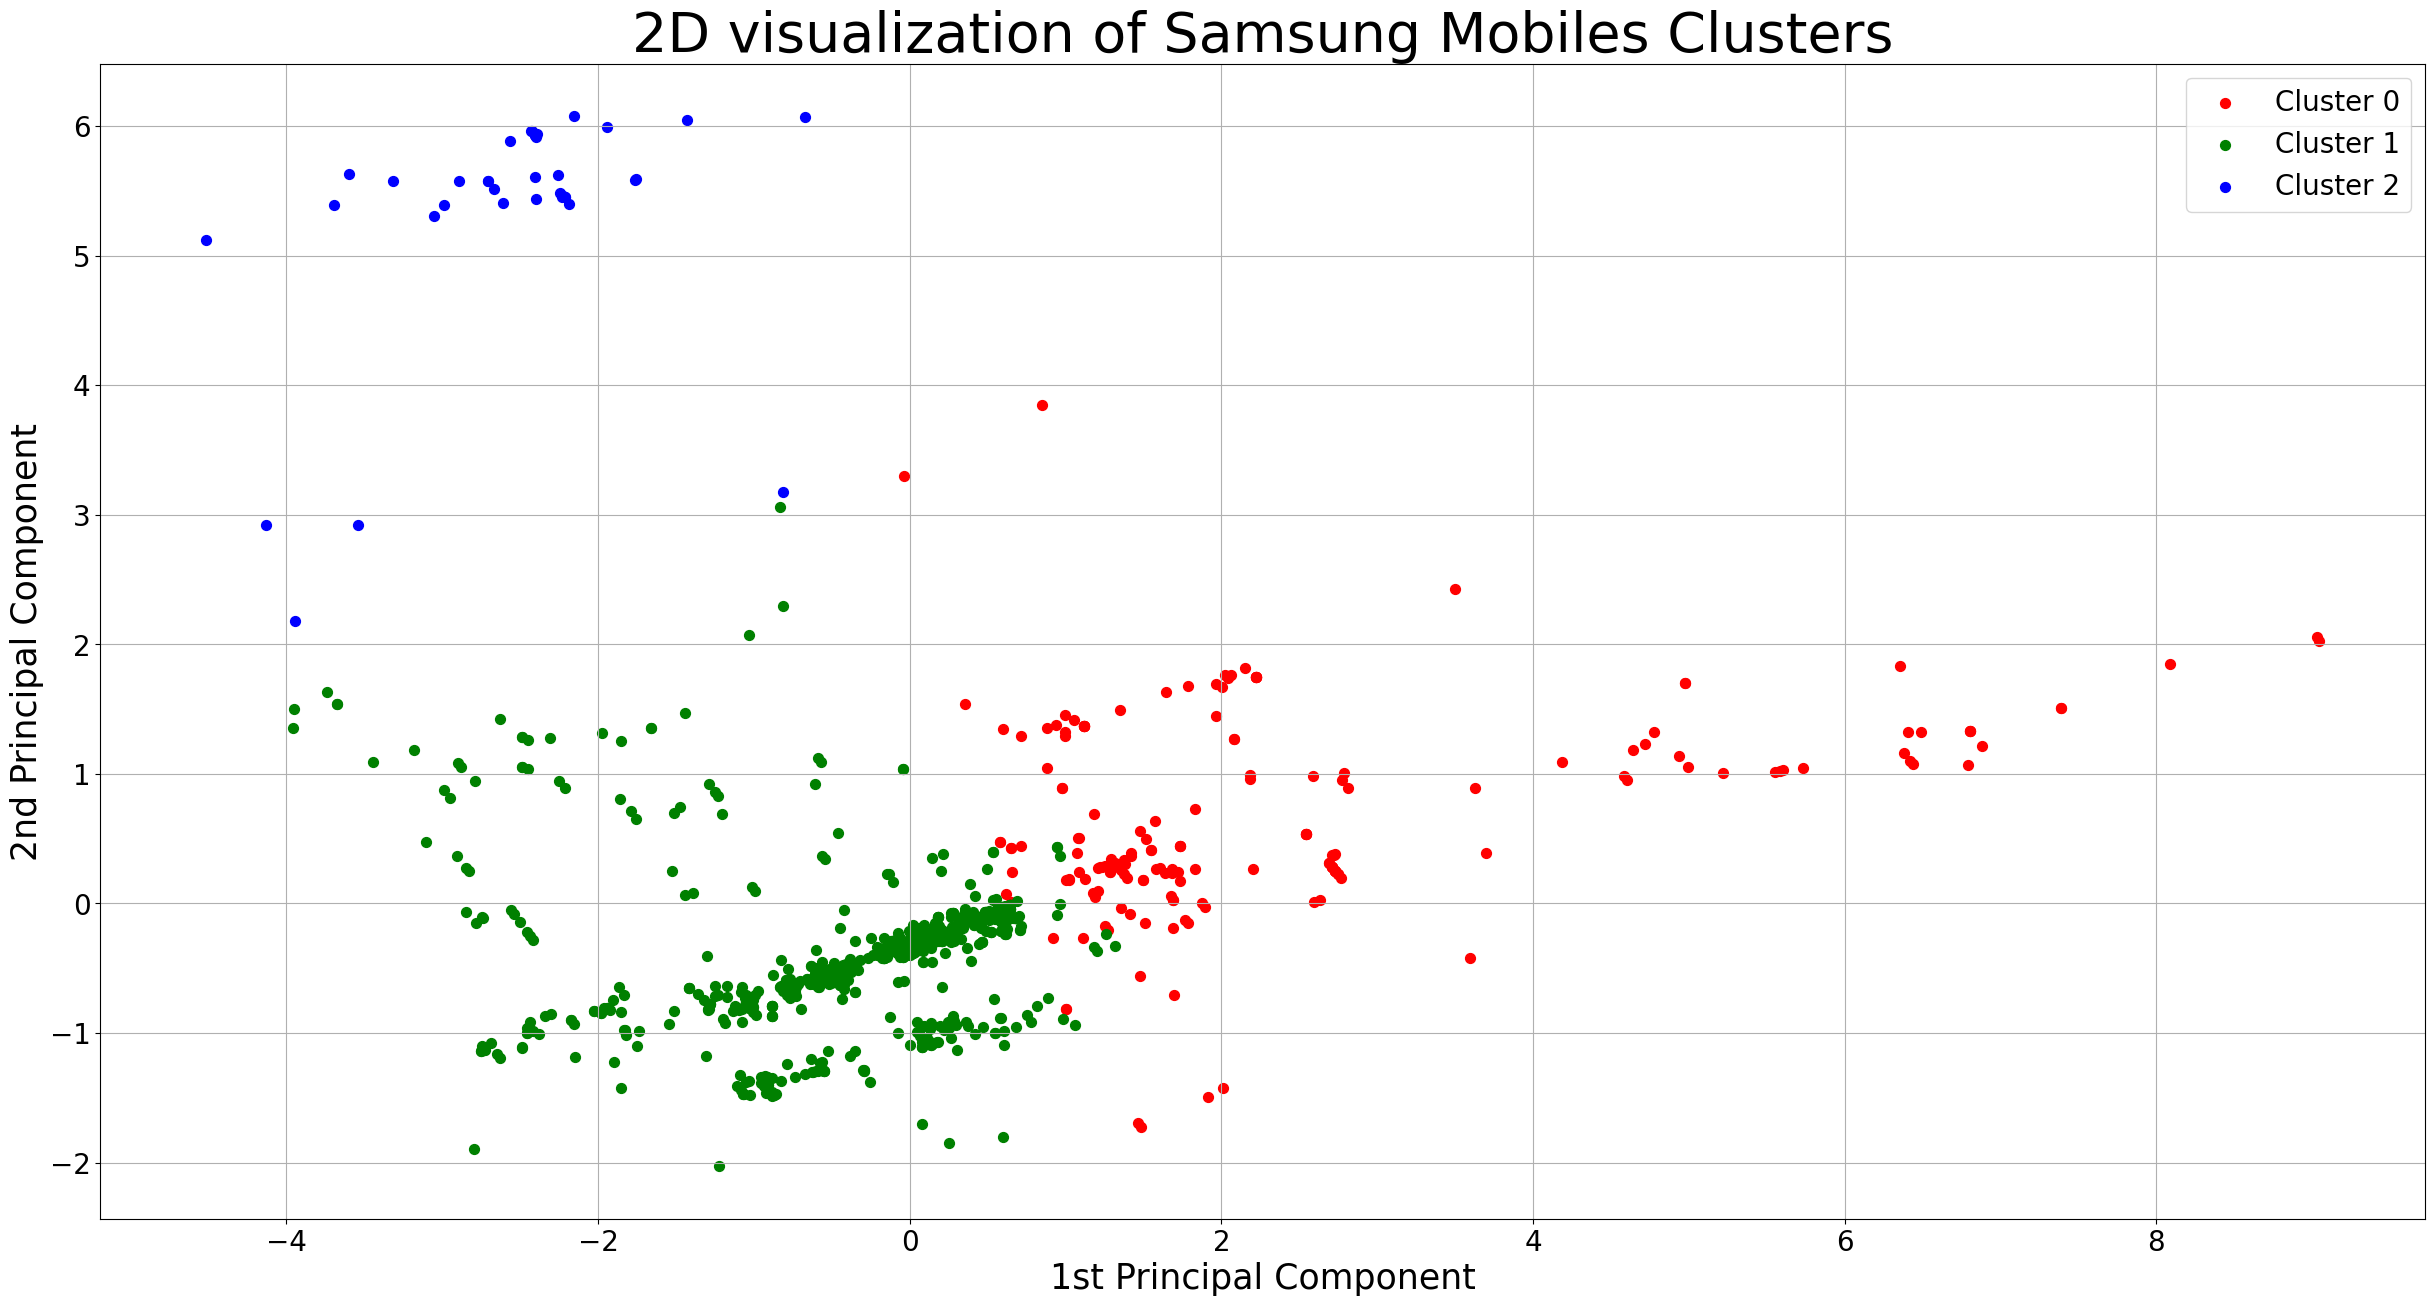

In [140]:
fig = plt.figure(figsize=(30,15))
plt.rcParams['font.size'] = 20


ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('1st Principal Component').set_fontsize(25)
ax.set_ylabel('2nd Principal Component').set_fontsize(25)
ax.set_title('2D visualization of Samsung Mobiles Clusters').set_fontsize(40)

colors = ['r', 'g', 'b']
for cluster in range(3):
    indicesToKeep = final_df['cluster'] == cluster
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'], final_df.loc[indicesToKeep, 'principal component 2'], c=colors[cluster], s=50)

ax.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
ax.grid()


In [141]:
cluster_characteristics = full_data.groupby('cluster')[features].mean()
print(cluster_characteristics)

                price   ratings       ram  internal_storage  primary_camera  \
cluster                                                                       
0        60704.244444  4.213333  8.677778        198.400000       64.300000   
1        17267.288889  4.195163  5.149020        110.577778       45.288889   
2         3281.342105  4.178947  5.631579        110.842105       43.394737   

         secondary_camera  display_size  battery_capacity  
cluster                                                    
0               21.422222     16.735000       4596.655556  
1               11.619608     16.394209       4986.665359  
2               11.052632      5.198684        959.210526  


Cluster 0 (High-End Segment): This cluster can be characterized by mobiles with high prices (average price is approximately 60704) and high specifications. The mobiles in this cluster have a larger average RAM size (8.68), larger internal storage (198.4), and more powerful cameras (primary camera is 64.3 MP and secondary camera is 21.42 MP). These are most likely high-end phones.

Cluster 1 (Mid-Range Segment): This cluster can be characterized by mobiles with moderate prices (average price is approximately 17267) and moderate specifications. The mobiles in this cluster have a medium average RAM size (5.15), medium internal storage (110.58), and medium-performance cameras (primary camera is 45.29 MP and secondary camera is 11.62 MP). These are most likely mid-range phones.

Cluster 2 (Budget Segment): This cluster can be characterized by mobiles with low prices (average price is approximately 3281) and lower specifications. The mobiles in this cluster have a lower average RAM size (5.63), lower internal storage (110.84), and lower-performance cameras (primary camera is 43.39 MP and secondary camera is 11.05 MP). These are most likely budget-friendly phones.

## 5.Price Prediction Model

Select relevant columns for model training

In [142]:
selected_columns = ['ratings', 'ram', 'battery_capacity', 'cluster', 'price']
data_selected = full_data[selected_columns]

Drop rows with missing target values (price) if any

In [143]:
data_selected = data_selected.dropna(subset=['price'])

Separate features (X) and target (y)

In [144]:
X = data_selected.drop(columns=['price'])
y = data_selected['price']

Handle missing values by filling them with the mean of each column

In [145]:
X_filled = X.fillna(X.mean())

Encode categorical variables using one-hot encoding

In [146]:
X_encoded = pd.get_dummies(X_filled)

Now split the data into training and testing sets

In [147]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

Initialize all the models

In [148]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(n_estimators=100, random_state=0),
    SVR(),
    GradientBoostingRegressor(random_state=0)
]

Train and evaluate each model

In [149]:
for model in models:
    model_name = model.__class__.__name__
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate the mean absolute error of the predictions
    mae = mean_absolute_error(y_test, predictions)
    
    print(f"{model_name} MAE: ", mae)

LinearRegression MAE:  9802.987140356052
DecisionTreeRegressor MAE:  7714.484445867494
RandomForestRegressor MAE:  7522.654669540377
SVR MAE:  14064.978242211184
GradientBoostingRegressor MAE:  7311.217042660507


In [150]:
important_features_data = full_data[['ratings', 'ram', 'battery_capacity', 'cluster', 'price']]

Step 2: Prepare the data for modeling

In [151]:
X = important_features_data[['ratings', 'ram', 'battery_capacity', 'cluster']]
y = important_features_data['price']

Step 3: Train the GradientBoostingRegressor
- Assuming you have already split the data into training and testing sets, and X_train, y_train are the training data.
  - You can also use the entire dataset for training if you prefer.

In [152]:
model = GradientBoostingRegressor()
model.fit(X, y)

GradientBoostingRegressor()

Step 4: Get the feature importances

In [153]:
feature_importances = model.feature_importances_

Step 5: Sort and display the important features

In [154]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

            Feature  Importance
3           cluster    0.546308
2  battery_capacity    0.209037
1               ram    0.200661
0           ratings    0.043995


### Getting Prediction

Function to make a price prediction based on user input

In [155]:
def predict_price(ratings, ram, battery_capacity, cluster):
    # Create a DataFrame with the user input
    input_data = pd.DataFrame({
        'ratings': [ratings],
        'ram': [ram],
        'battery_capacity': [battery_capacity],
        'cluster': [cluster]
    })
    # Handle missing values in the input
    input_data_filled = input_data.fillna(input_data.mean())

    # Make the price prediction using the trained GradientBoostingRegressor
    price_prediction = models[-1].predict(input_data_filled)[0]

    return price_prediction

# Create input widgets for user input
ratings_input = widgets.FloatSlider(description='Ratings:', min=1.0, max=5.0, step=0.1, value=3.0)
ram_input = widgets.FloatSlider(description='RAM (GB):', min=0.0, max=16.0, step=0.5, value=4.0)
battery_capacity_input = widgets.FloatSlider(description='Battery Capacity (mAh):', min=0.0, max=10000.0, step=10.0, value=5000.0)
cluster_options = [0, 1, 2]
cluster_input = widgets.Dropdown(description='Cluster:', options=cluster_options, value=0)

# Create a button for prediction
predict_button = widgets.Button(description='Predict Price')

# Output widget to display the prediction result
output = widgets.Output()

Function to handle the button click and display the prediction

In [156]:
def on_predict_button_click(button):
    # Clear previous output
    output.clear_output()

    # Get user input
    ratings = ratings_input.value
    ram = ram_input.value
    battery_capacity = battery_capacity_input.value
    cluster = cluster_input.value

    # Make the price prediction
    price_prediction = predict_price(ratings, ram, battery_capacity, cluster)

    # Display the prediction
    with output:
        print(f"Predicted Price: ₹ {price_prediction:.2f}")


In [157]:
# Attach the click event to the button
predict_button.on_click(on_predict_button_click)

# Display the widgets
display(ratings_input, ram_input, battery_capacity_input, cluster_input, predict_button, output)

FloatSlider(value=3.0, description='Ratings:', max=5.0, min=1.0)

FloatSlider(value=4.0, description='RAM (GB):', max=16.0, step=0.5)

FloatSlider(value=5000.0, description='Battery Capacity (mAh):', max=10000.0, step=10.0)

Dropdown(description='Cluster:', options=(0, 1, 2), value=0)

Button(description='Predict Price', style=ButtonStyle())

Output()